<a href="https://www.kaggle.com/code/muhammadzainurrahman/yogyakarta-housing-price?scriptVersionId=214982065" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/yogyakarta-housing-price-ndonesia/rumah123_yogya_unfiltered.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/kaggle/input/yogyakarta-housing-price-ndonesia/rumah123_yogya_unfiltered.csv')
df

,price,nav-link,description,listing-location,bed,bath,carport,surface_area,building_area
0,"Rp 1,79 Miliar",https://www.rumah123.com/properti/sleman/hos17...,Rumah 2 Lantai Baru di jalan Palagan Sleman Y...,"Ngaglik, Sleman",3.0,3.0,2.0,120 m²,110 m²
1,Rp 170 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH BARU DEKAT AL AZHAR DAN UGM,"Jombor, Sleman",3.0,2.0,1.0,102 m²,126 m²
2,Rp 695 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH ASRI DAN SEJUK DI BERBAH SLEMAN DEKAT PA...,"Berbah, Sleman",2.0,2.0,1.0,100 m²,100 m²
3,Rp 560 Juta,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah 5 Menit Dari Candi Prambanan Tersi...,"Prambanan, Sleman",3.0,1.0,1.0,109 m²,67 m²
4,Rp 200 Juta,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah Cicilan 1jt Di Moyudan Sleman,"Moyudan, Sleman",2.0,1.0,1.0,60 m²,30 m²
...,...,...,...,...,...,...,...,...,...
2015,Rp 500 Juta,https://www.rumah123.com/properti/sleman/hos17...,"Rumah Baru, 500 Juta, Bisa Kpr Di Kalasan, Sleman","Kalasan, Sleman",3.0,2.0,2.0,104 m²,80 m²
2016,Rp 750 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH MINIMALIS AREA JL KABUPATEN SLEMAN,"Gamping, Sleman",2.0,1.0,1.0,89 m²,60 m²
2017,Rp 756 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH SKANDINAVIAN DI JL GITOGATI NGAGLIK (5 M...,"Ngaglik, Sleman",2.0,1.0,2.0,140 m²,60 m²
2018,"Rp 1,78 Miliar",https://www.rumah123.com/properti/sleman/hos16...,Rumah Mewah Dekat Kampus Ugm di Maguwoharjo Da...,"Depok, Sleman",4.0,3.0,2.0,118 m²,160 m²


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             2020 non-null   object 
 1   nav-link          2020 non-null   object 
 2   description       2020 non-null   object 
 3   listing-location  2020 non-null   object 
 4   bed               2001 non-null   float64
 5   bath              1999 non-null   float64
 6   carport           1713 non-null   float64
 7   surface_area      2019 non-null   object 
 8   building_area     2019 non-null   object 
dtypes: float64(3), object(6)
memory usage: 142.2+ KB


In [4]:
def clean_and_convert_price(price):
    price = re.sub(r',', '.', price) 
    price = re.sub(r'Rp\s?', '', price)
    if "Miliar" in price:
        price = re.sub(r'\s*Miliar', '', price)
        price = float(price) * 1_000_000_000
    elif "Juta" in price:
        price = re.sub(r'\s*Juta', '', price)
        price = float(price) * 1_000_000
    return price

df["price"] = df["price"].apply(clean_and_convert_price)
df['location'] = [x.split(',')[-1] for x in df['listing-location']]
df['surface_area'] = [str(x).split()[0] for x in df['surface_area']]
df['building_area'] = [str(x).split()[0] for x in df['building_area']]
df.drop(columns = ['nav-link','description','listing-location'], inplace = True)
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1713 entries, 0 to 2019
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          1713 non-null   float64
 1   bed            1713 non-null   float64
 2   bath           1713 non-null   float64
 3   carport        1713 non-null   float64
 4   surface_area   1713 non-null   object 
 5   building_area  1713 non-null   object 
 6   location       1713 non-null   object 
dtypes: float64(4), object(3)
memory usage: 107.1+ KB


In [5]:
df['price'] = df['price'].astype('int64')
df['bed'] = df['bed'].astype('int64')
df['bath'] = df['bath'].astype('int64')
df['carport'] = df['carport'].astype('int64')
df['building_area'] = df['building_area'].astype('float64')
df['surface_area'] = df['surface_area'].astype('float64')
df['location'] = df['location'].str.strip()
df.rename(columns = {'building_area':'building_area(m2)',
          'surface_area':'surface_area(m2)'}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1713 entries, 0 to 2019
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              1713 non-null   int64  
 1   bed                1713 non-null   int64  
 2   bath               1713 non-null   int64  
 3   carport            1713 non-null   int64  
 4   surface_area(m2)   1713 non-null   float64
 5   building_area(m2)  1713 non-null   float64
 6   location           1713 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 107.1+ KB


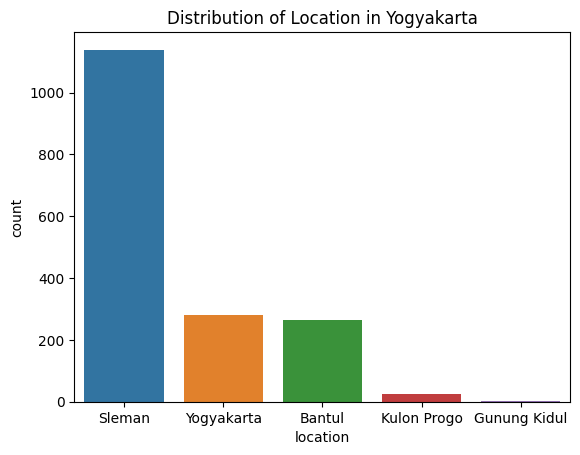

In [6]:
sns.countplot(data = df, x = 'location')
plt.title(f"Distribution of Location in Yogyakarta");

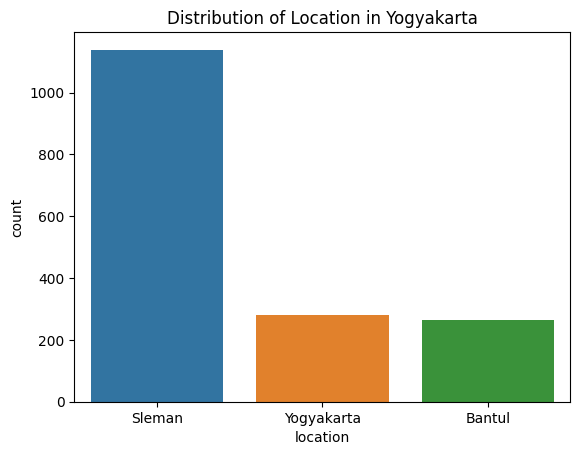

In [7]:
df = df[df['location'].isin(['Sleman','Yogyakarta','Bantul'])]
sns.countplot(data = df, x = 'location')
plt.title(f"Distribution of Location in Yogyakarta");

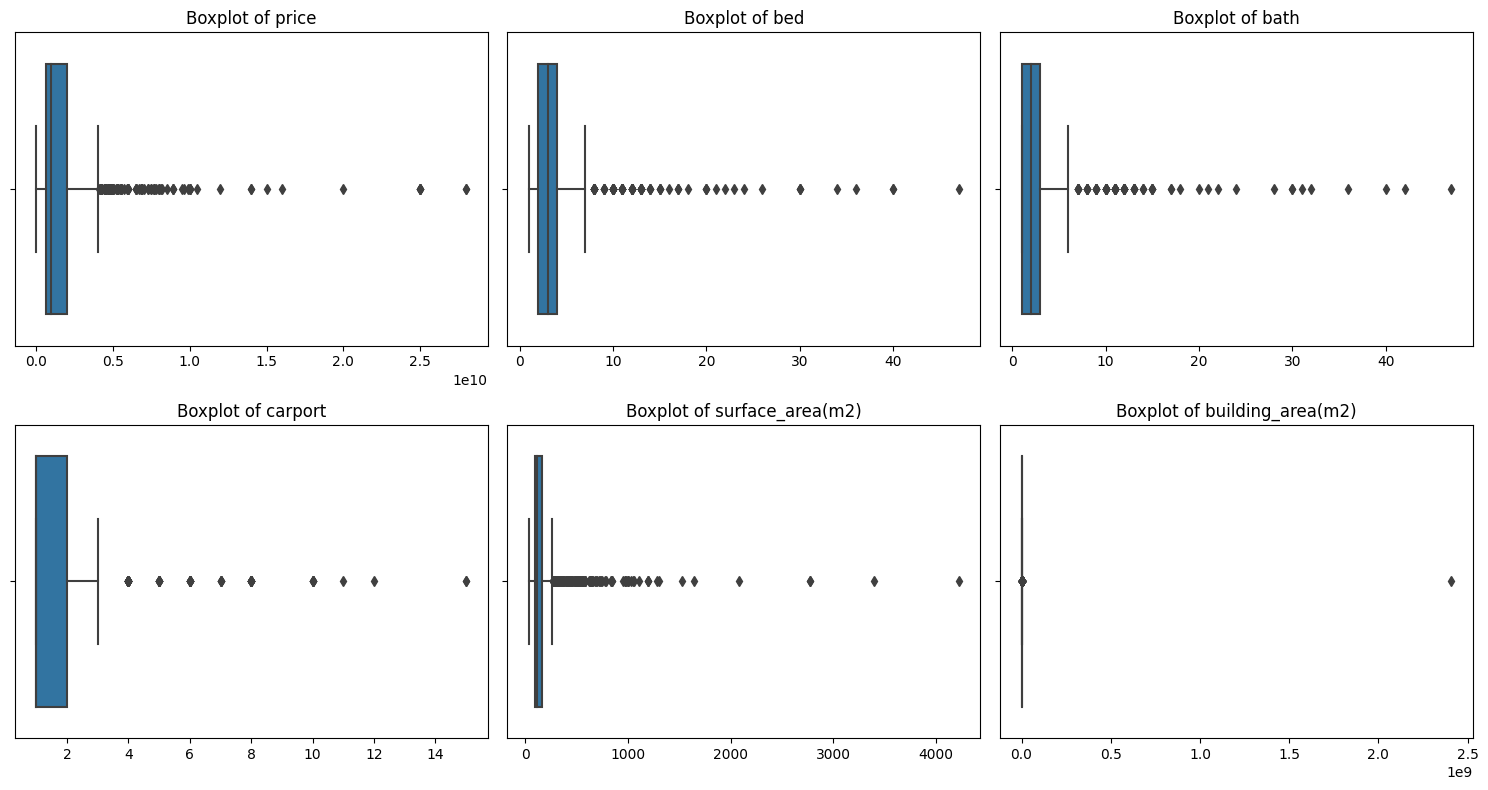

In [8]:
numeric_data = df.select_dtypes(exclude=['object']).columns.to_list()
plt.figure(figsize=(15,8))
for i,x in enumerate(numeric_data):
    plt.subplot(2,3,i+1)
    sns.boxplot(data=df, x = x)
    plt.title(f"Boxplot of {x}")
    plt.xlabel("")
    plt.ylabel("")
plt.tight_layout();

In [9]:
Q1 = df['building_area(m2)'].quantile(0.25)
Q3 = df['building_area(m2)'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['building_area(m2)'] < (Q1 - 1.5 * IQR)) | (df['building_area(m2)'] > (Q3 + 1.5 * IQR)))]
Q1 = df['surface_area(m2)'].quantile(0.25)
Q3 = df['surface_area(m2)'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['surface_area(m2)'] < (Q1 - 1.5 * IQR)) | (df['surface_area(m2)'] > (Q3 + 1.5 * IQR)))]
 

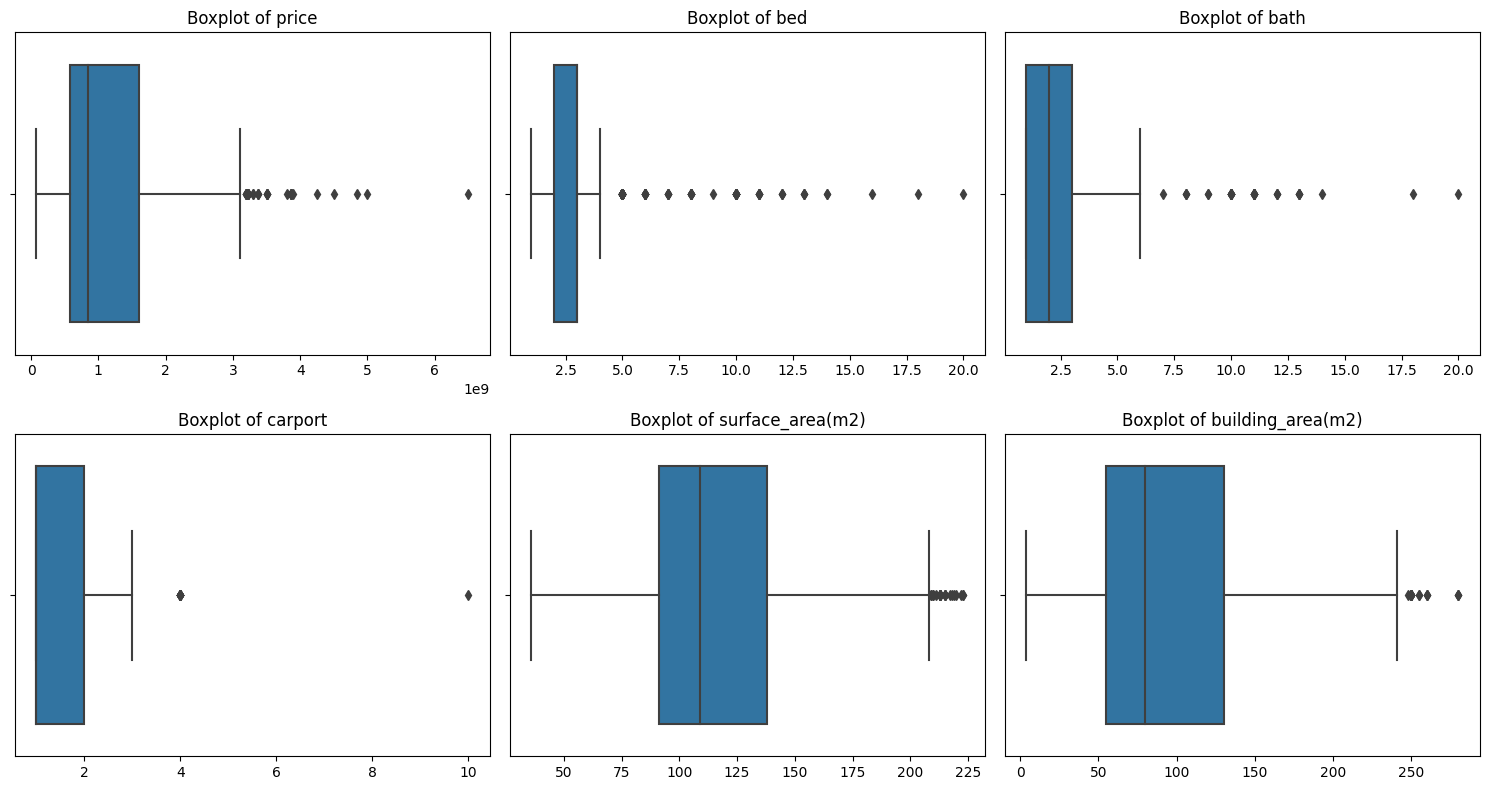

In [10]:
numeric_data = df.select_dtypes(exclude=['object']).columns.to_list()
plt.figure(figsize=(15,8))
for i,x in enumerate(numeric_data):
    plt.subplot(2,3,i+1)
    sns.boxplot(data=df, x = x)
    plt.title(f"Boxplot of {x}")
    plt.xlabel("")
    plt.ylabel("")
plt.tight_layout();

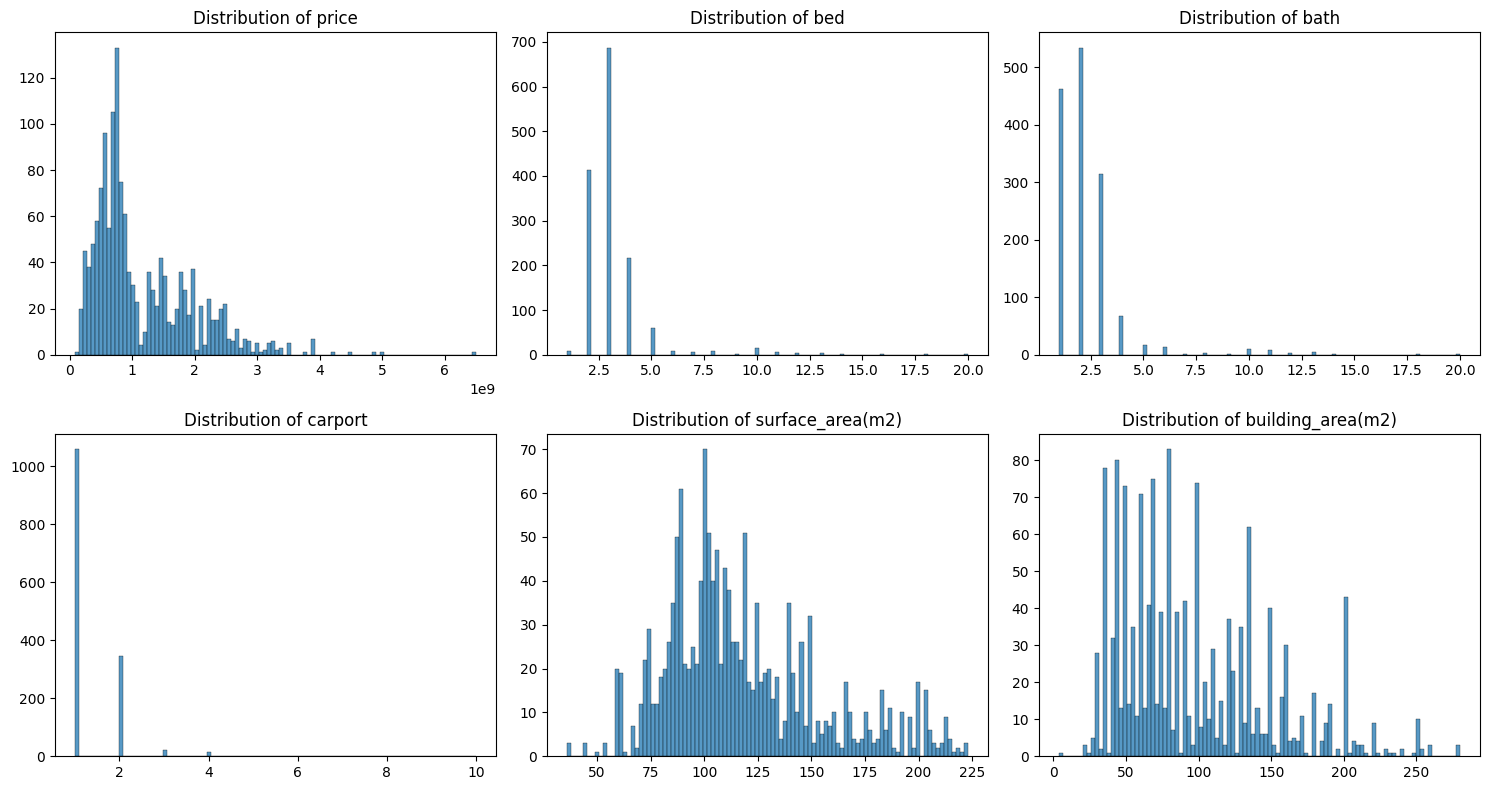

In [11]:
numeric_data = df.select_dtypes(exclude=['object']).columns.to_list()
plt.figure(figsize=(15,8))
for i,x in enumerate(numeric_data):
    plt.subplot(2,3,i+1)
    sns.histplot(data=df, x = x, bins =100)
    plt.title(f"Distribution of {x}")
    plt.xlabel("")
    plt.ylabel("")
plt.tight_layout();

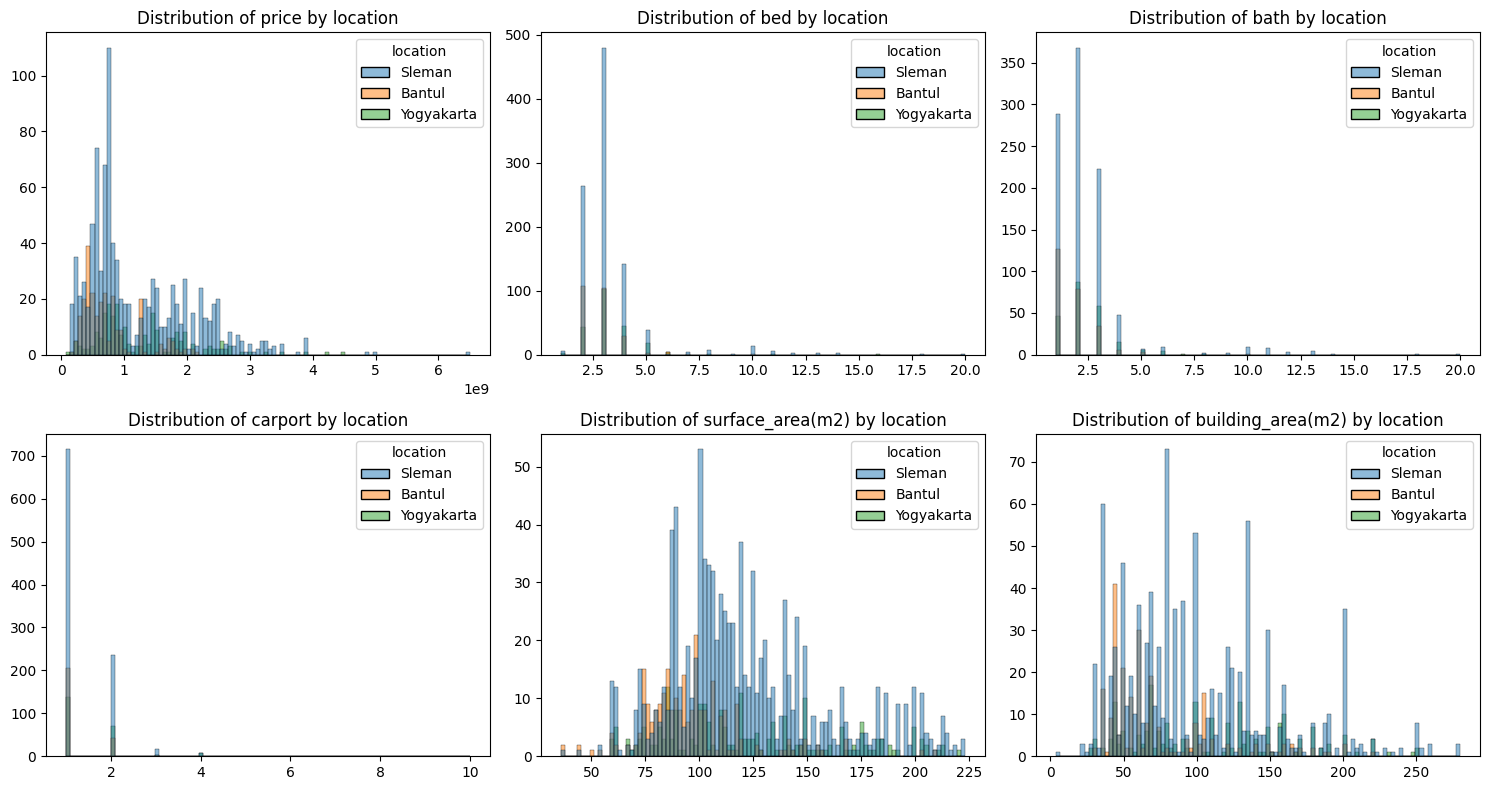

In [12]:
numeric_data = df.select_dtypes(exclude=['object']).columns.to_list()
plt.figure(figsize=(15,8))
for i,x in enumerate(numeric_data):
    plt.subplot(2,3,i+1)
    sns.histplot(data=df, x = x, bins =100, hue = 'location')
    plt.title(f"Distribution of {x} by location")
    plt.xlabel("")
    plt.ylabel("")
plt.tight_layout();

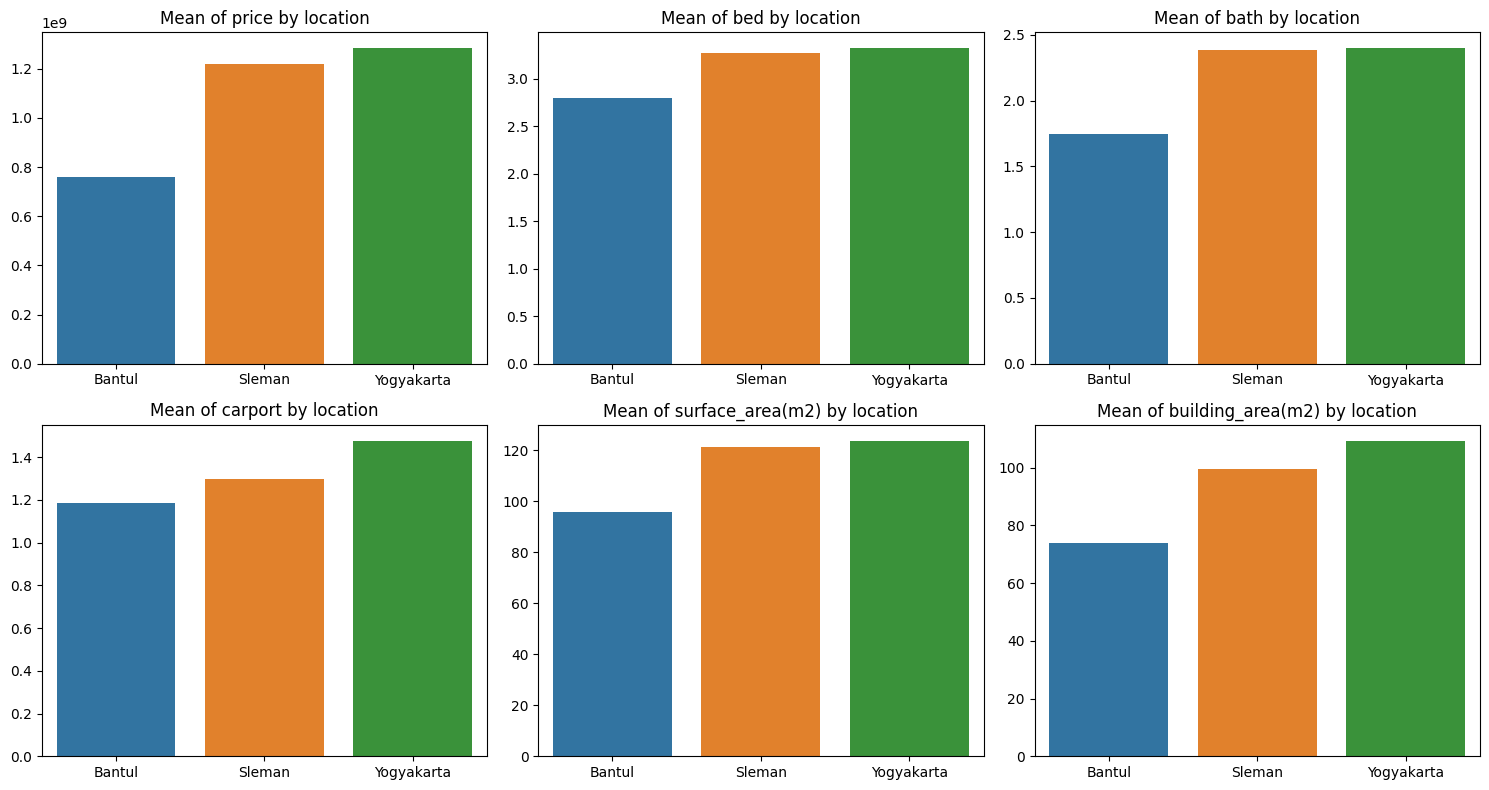

In [13]:
plt.figure(figsize=(15,8))
for i,a in enumerate(numeric_data) :
    group_data = df.groupby(['location'])[a].mean().reset_index()
    plt.subplot(2,3,i+1)
    sns.barplot(data = group_data, x = 'location', y = a)
    plt.title(f"Mean of {a} by location")
    plt.xlabel("")
    plt.ylabel("")
plt.tight_layout();
    
    

In [14]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
le = LabelEncoder()
df['location'] = le.fit_transform(df['location'])
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
x = df.drop(columns = ['price'])
y = df[['price']]
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 42, test_size = 0.2)
x_train = x_scaler.fit_transform(x_train)
y_train = y_scaler.fit_transform(y_train)
x_test = x_scaler.transform(x_test)
y_test = y_scaler.transform(y_test)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1153, 6)
(289, 6)
(1153, 1)
(289, 1)


In [15]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

test_model = [LinearRegression(),
              DecisionTreeRegressor(random_state =42),
              RandomForestRegressor(random_state =42), 
              ExtraTreesRegressor(random_state =42), 
              GradientBoostingRegressor(random_state =42), 
              AdaBoostRegressor(random_state =42),
              XGBRegressor(random_state=42)]

model = ['Linear Regression',
         'Decision Tree Regressor',
         'Random Forest Regressor',
         'ExtraTrees Regressor',
         'GradientBoosting Regressor',
         'AdaBoost Regressor',
         'XGB Regressor']

result = pd.DataFrame(columns=['Model','MSE','RMSE','R2'])

for i, x in enumerate(test_model):
    # Melatih model
    x.fit(x_train, y_train)
    
    y_pred = x.predict(x_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    results = pd.DataFrame({'Model':[model[i]],
                            'MSE':[mse],
                            'RMSE':[rmse],
                            'R2':[r2]})
    
    result = pd.concat([result, results], ignore_index=True)

result.sort_values(ascending = False, by = 'R2')


,Model,MSE,RMSE,R2
3,ExtraTrees Regressor,0.002165,0.046526,0.853984
2,Random Forest Regressor,0.002395,0.048936,0.838465
6,XGB Regressor,0.003065,0.055364,0.793236
4,GradientBoosting Regressor,0.003116,0.055823,0.789799
0,Linear Regression,0.003742,0.061172,0.747582
1,Decision Tree Regressor,0.004265,0.065303,0.712337
5,AdaBoost Regressor,0.004703,0.068578,0.682763


In [16]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesRegressor
import numpy as np

# Model regresi
model = ExtraTreesRegressor(random_state=42)

# Hyperparameter yang akan diuji
param_dist = {'n_estimators': [50, 100, 150,200,250,300],
              'min_samples_leaf': np.arange(1, 15)}

# RandomizedSearchCV untuk hyperparameter tuning
random = RandomizedSearchCV(estimator=model,
                            param_distributions=param_dist,
                            n_iter=50,
                            cv=2,
                            random_state=42,
                            verbose=2)

# Melatih model
random.fit(x_train, y_train)

# Menampilkan hasil terbaik
print(f"Best parameters: {random.best_params_}")
print(f"Best score (R²): {random.best_score_}")

# Memprediksi hasil
y_pred = random.best_estimator_.predict(x_test)

# Menghitung metrik regresi
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Menampilkan hasil metrik
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


Fitting 2 folds for each of 50 candidates, totalling 100 fits
[CV] END ..............min_samples_leaf=13, n_estimators=100; total time=   0.1s
[CV] END ..............min_samples_leaf=13, n_estimators=100; total time=   0.1s
[CV] END ................min_samples_leaf=1, n_estimators=50; total time=   0.1s
[CV] END ................min_samples_leaf=1, n_estimators=50; total time=   0.1s
[CV] END ..............min_samples_leaf=10, n_estimators=250; total time=   0.3s
[CV] END ..............min_samples_leaf=10, n_estimators=250; total time=   0.3s
[CV] END ...............min_samples_leaf=4, n_estimators=250; total time=   0.3s
[CV] END ...............min_samples_leaf=4, n_estimators=250; total time=   0.3s
[CV] END ................min_samples_leaf=3, n_estimators=50; total time=   0.1s
[CV] END ................min_samples_leaf=3, n_estimators=50; total time=   0.1s
[CV] END ..............min_samples_leaf=12, n_estimators=250; total time=   0.3s
[CV] END ..............min_samples_leaf=12, n_e

In [17]:
best_param= random.best_params_
print("Best Parameters:", best_param)
best_model= random.best_estimator_
print("Best model:", best_model)

Best Parameters: {'n_estimators': 50, 'min_samples_leaf': 2}
Best model: ExtraTreesRegressor(min_samples_leaf=2, n_estimators=50, random_state=42)


In [18]:
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor
pipeline = Pipeline([
    ('scaler', x_scaler),
    ('model', TransformedTargetRegressor(
        regressor = best_model,
        transformer = y_scaler
    ))
])
pipeline.fit(x_train,y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 TransformedTargetRegressor(regressor=ExtraTreesRegressor(min_samples_leaf=2,
                                                                          n_estimators=50,
                                                                          random_state=42),
                                            transformer=MinMaxScaler()))])

In [19]:
y_pred = pipeline.predict(x_test)

# Menghitung metrik regresi
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MSE: 0.0020887774642143146
RMSE: 0.04570314501447701
R²: 0.8591013780643639


In [20]:
import joblib
joblib.dump(pipeline, 'Yogyakarta_housing_price_prediction_model.pkl')
print('Model has been saved')
joblib.dump(le, 'encoder.pkl')
print('Encoder has been saved')

Model has been saved
Encoder has been saved


In [21]:
#download model and encoder
import shutil

# Misalnya model disimpan sebagai 'model.pkl'
shutil.move('Yogyakarta_housing_price_prediction_model.pkl', '/kaggle/working/Yogyakarta_housing_price_prediction_model.pkl')
print('Model has been downloaded')
shutil.move('encoder.pkl', '/kaggle/working/encoder.pkl')
print('Encoder has been downloaded')

Model has been downloaded
Encoder has been downloaded
